In [6]:
%load_ext autoreload
%matplotlib inline
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys

In [8]:
#sys.path.append("../..")
sys.path.append("..")

from WatChMaL.analysis.multi_plot_utils import multi_disp_learn_hist, multi_compute_roc, multi_plot_roc
from WatChMaL.analysis.comparison_utils import multi_get_masked_data, multi_collapse_test_output
from WatChMaL.analysis.plot_utils import plot_classifier_response, plot_reduced_classifier_response

In [9]:
label_dict         = {"$\gamma$":0, "$e$":1, "$\mu$":2}
inverse_label_dict = {0:"$\gamma$", 1:"$e$", 2:"$\mu$"}

muon_softmax_index_dict = {"e/gamma":0, "mu":1}

c = plt.cm.viridis(np.linspace(0,1,10)) #plt.rcParams['axes.prop_cycle'].by_key()['color']

In [10]:
############# define run locations #############
locs = ['/home/jtindall/WatChMaL/outputs/2021-02-16/full_veto_train_full_veto_test/outputs'
        #'/home/jtindall/WatChMaL/outputs/2021-02-08/no_veto_train_full_veto_test/outputs' # trained with no veto
        ]

titles = ['Short Tank No Veto Run 1',
          'Short Tank No Veto Run 2']

In [11]:
linecolor = [c[0] for _ in locs]
linestyle = ['--' for _ in locs]

In [12]:
############# load short tank run data #############
raw_output_softmax = [np.load(loc + "/softmax.npy") for loc in locs]
raw_actual_labels  = [np.load(loc + "/labels.npy") for loc in locs]
raw_actual_indices = [np.load(loc + "/indices.npy") for loc in locs]

[<AxesSubplot:>]


../WatChMaL/analysis/plot_utils.py:611: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ylim = next(ylim_iter)


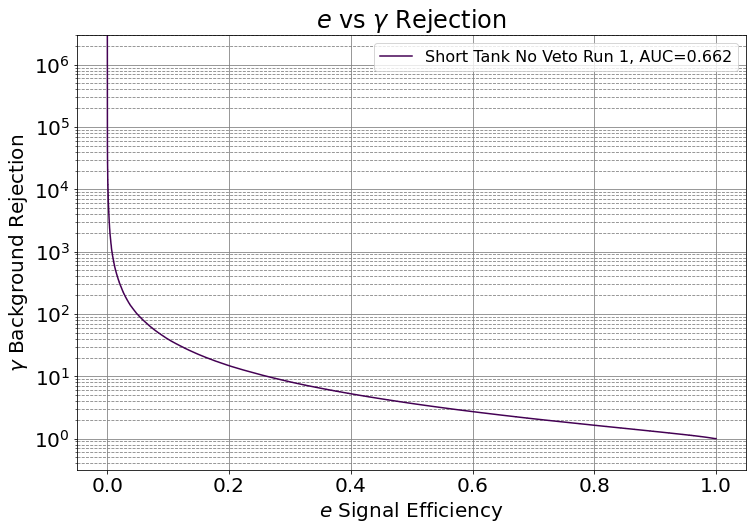

In [39]:
############# compute short tank multi e/gamma ROC #############
fprs, tprs, thrs = multi_compute_roc(raw_output_softmax, raw_actual_labels, 
                                                         true_label=label_dict["$e$"], 
                                                         false_label=label_dict["$\gamma$"],
                                                         normalize=False)

figs = multi_plot_roc(fprs, tprs, thrs, "$e$", "$\gamma$", 
                      fig_list=[1], ylims=[[0,3e6]], 
                      linestyles=linestyle,linecolors=linecolor, 
                      plot_labels=titles, show=False)

[<AxesSubplot:>]
[<AxesSubplot:>]


../WatChMaL/analysis/plot_utils.py:610: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  if ylims is not None:


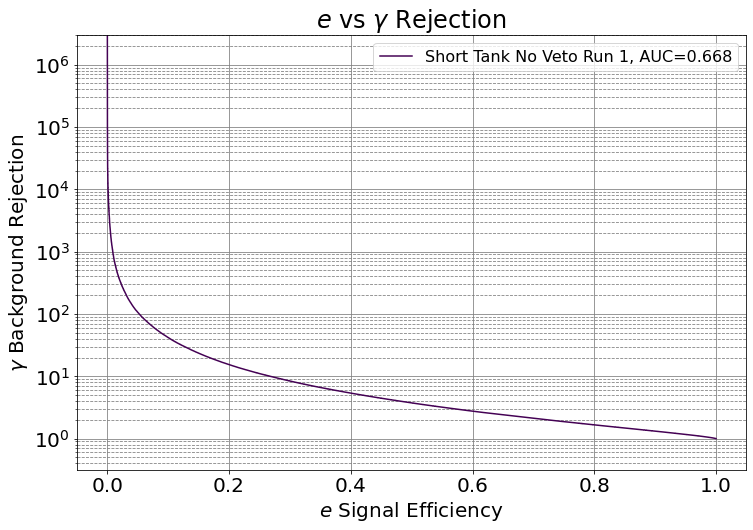

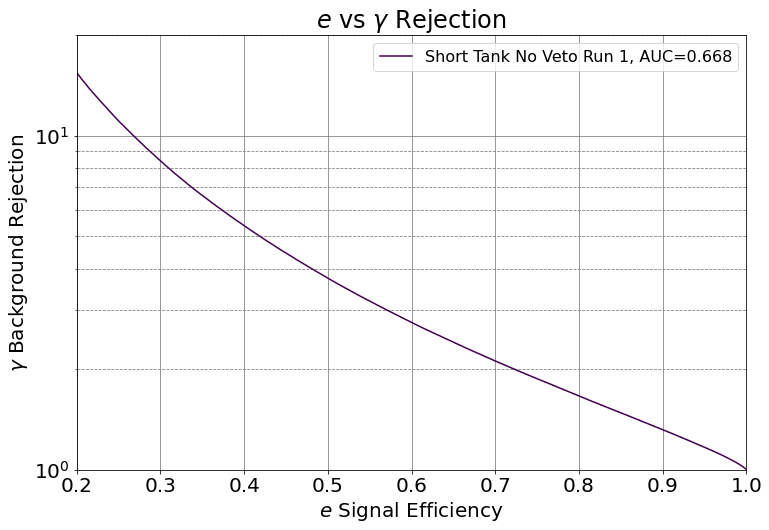

In [41]:
############# compute short tank multi e/gamma ROC #############
fprs, tprs, thrs = multi_compute_roc(raw_output_softmax, raw_actual_labels, 
                                                         true_label=label_dict["$e$"], 
                                                         false_label=label_dict["$\gamma$"],
                                                         normalize=True)

figs = multi_plot_roc(fprs, tprs, thrs, "$e$", "$\gamma$", 
                      fig_list=[1], ylims=[[0,3e6]], 
                      linestyles=linestyle,linecolors=linecolor, 
                      plot_labels=titles, show=False)


figs = multi_plot_roc(fprs, tprs, thrs, "$e$", "$\gamma$", 
                      fig_list=[1],
                      xlims=[[0.2,1.0]],ylims=[[1e0,2e1]],
                      linestyles=linestyle,linecolors=linecolor, 
                      plot_labels=titles, show=False)

In [16]:
linecolor = [c[0] for _ in range(20)]
linestyle = ['-' for _ in range(20)]

{'$\\gamma$': 0, '$e$': 1, '$\\mu$': 2}
{'$\\gamma$': 0, '$e$': 1, '$\\mu$': 2}
{'$\\gamma$': 0, '$e$': 1, '$\\mu$': 2}


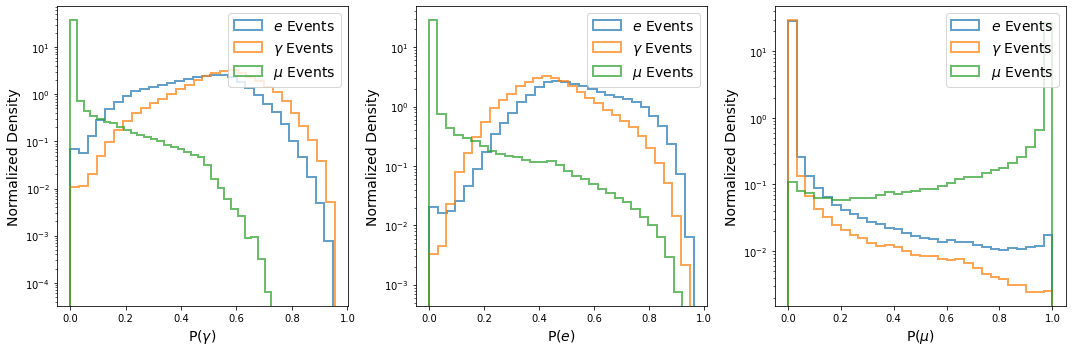

In [17]:
plot_classifier_response(raw_output_softmax[0], raw_actual_labels[0],
                                     label_dict=label_dict,
                                     linestyles=linestyle,
                                     particle_names = ["$e$","$\gamma$",'$\mu$']
                                     )

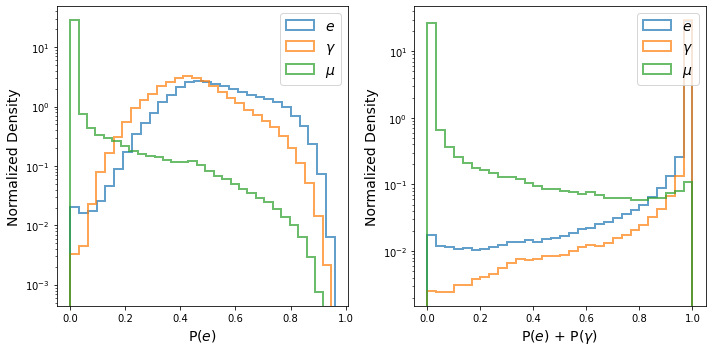

In [18]:
plot_reduced_classifier_response(raw_output_softmax[0], raw_actual_labels[0],
                                     comparisons_list = [{'independent':['$e$'],
                                                          'dependent':['$e$',"$\gamma$",'$\mu$']},
                                                         {'independent':['$e$','$\gamma$'],
                                                          'dependent':['$e$',"$\gamma$",'$\mu$']},],
                                     label_dict=label_dict,
                                     linestyles=linestyle
                                     )

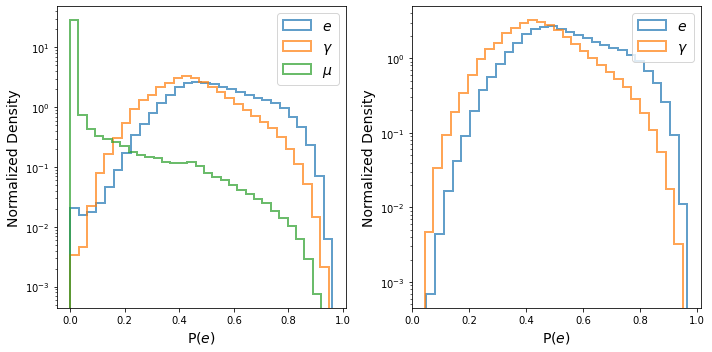

In [19]:
plot_reduced_classifier_response(raw_output_softmax[0], raw_actual_labels[0],
                                     comparisons_list = [{'independent':['$e$'],
                                                          'dependent':['$e$',"$\gamma$",'$\mu$']},
                                                         {'independent':['$e$'],
                                                          'dependent':['$e$',"$\gamma$"]},],
                                     label_dict=label_dict,
                                     linestyles=linestyle
                                     )

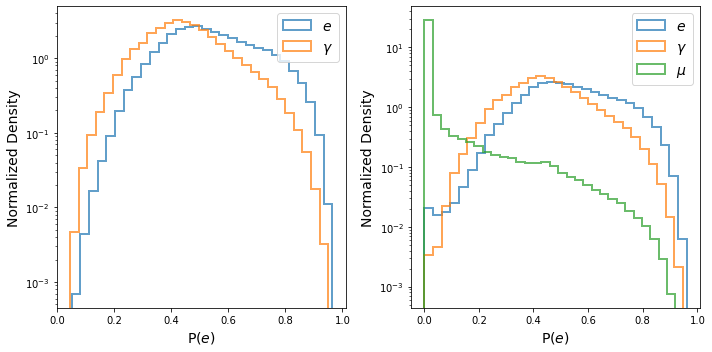

In [20]:
plot_reduced_classifier_response(raw_output_softmax[0], raw_actual_labels[0],
                                     comparisons_list = [{'independent':['$e$'],
                                                          'dependent':['$e$',"$\gamma$"]},
                                                         {'independent':['$e$'],
                                                          'dependent':['$e$',"$\gamma$",'$\mu$']},
                                                         ],
                                     label_dict=label_dict,
                                     linestyles=linestyle,
                                     normalize=True
                                     )